In [1]:
import numpy as np
from get_periodic_orbits import make_broucke_path, plot_orbit, plot_orbit_and_approx, Broucke
from torus_rep import get_irreps, construct_orbit, plot_results, reorder_dataset

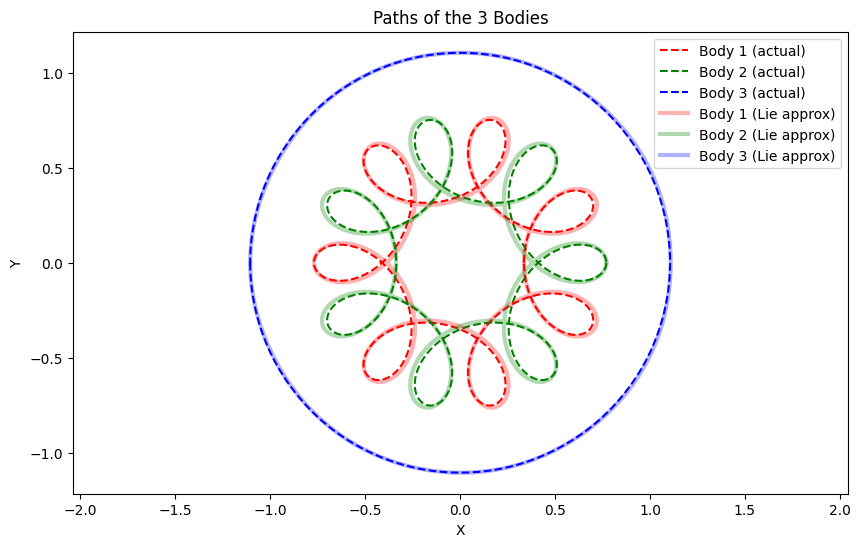

In [2]:
title = 'A2'
X = make_broucke_path(title)
X = X.T
X, weights, t = reorder_dataset(X, epsilon=1e-3)
P = get_irreps(x=X, t=t, plot_norms=False)
x_start = X[:, 0]
x_approx = construct_orbit(P, x_start, num_points=X.shape[1]).real
# plot_results(X, x_approx, projection='pca')
plot_orbit_and_approx(X.T, x_approx.T)